# Tumor classification using logestic regression

The **logestic regression** model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the **sigmoid function**.



$$ H = \frac{\mathrm1}{1 + \exp^-\theta^T.x} $$



<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190522162153/sigmoid-function-300x138.png"/>



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("data.csv")

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#dropping the unnessary columns

raw_data.drop([raw_data.columns[0],raw_data.columns[32]],axis=1,inplace=True)

In [6]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
raw_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)

In [8]:
raw_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)

In [9]:
training_data = raw_data[0:int(0.75*len(raw_data))]

In [10]:
training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [11]:
N = training_data.shape[0]

print(N)

426


In [12]:
#creating a matrix of class labels
C = np.array(training_data['diagnosis'])

In [13]:
#we obtain a one dimentional matrix i.e. row/column vector
print(C)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [14]:
#making it a column vector
C = C.reshape(C.shape[0],1)

In [15]:
print(C)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [16]:
 C.shape

(426, 1)

In [17]:
reduced_training_data = training_data.drop(['diagnosis'],axis=1,inplace=False)

In [18]:
reduced_training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [19]:
X = np.array(reduced_training_data)

In [20]:
X.shape

(426, 30)

In [21]:
np.max(X,axis=0)

array([2.811e+01, 3.928e+01, 1.885e+02, 2.499e+03, 1.447e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.256e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.313e+01, 4.954e+01, 2.293e+02, 3.432e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [22]:
#normalising the data
X = X/(np.max(X,axis=0))

In [23]:
np.max(X[])

SyntaxError: invalid syntax (<ipython-input-23-7be9c947d8a1>, line 1)

In [24]:
X

array([[0.63998577, 0.26425662, 0.65145889, ..., 0.91202749, 0.69313046,
        0.57301205],
       [0.73176805, 0.45239308, 0.70503979, ..., 0.63917526, 0.41428141,
        0.42901205],
       [0.70046247, 0.54098778, 0.68965517, ..., 0.83505155, 0.54429045,
        0.42207229],
       ...,
       [0.48594806, 0.48701629, 0.47458886, ..., 0.48350515, 0.41337752,
        0.4259759 ],
       [0.34656706, 0.48676171, 0.32854111, ..., 0.15769759, 0.48147032,
        0.3859759 ],
       [0.35681252, 0.54175153, 0.33522546, ..., 0.08862543, 0.35387165,
        0.38848193]])

In [25]:
#gradient decent algo
n = X.shape[1]
theta0_intial = np.random.randn(1,1)
theta_intial = np.random.randn(n,1)
epsilon = 0.000001
alpha = 0.001

neg_log_like_loss_history = []
iterations = []
i = 0

while (True):
    power_intial = theta0_intial + np.matmul(X,theta_intial)
    H_theta0_theta_intial = 1/(1 + np.exp(-power_intial))
    temp_intial = (H_theta0_theta_intial - C)
    
    
    
    del_theta0_intial = np.sum(temp_intial)
    del_intial = np.matmul(X.T,temp_intial)
    
    
    
    theta0_final = theta0_intial - (alpha * del_theta0_intial)  
    theta_final = theta_intial - (alpha * del_intial)
    
    #condition i.e If abs(-log(theta0_intial,theta_intial)+logL(theta0_final,theta_final)) < epsilon 
    
    neg_log_like_loss_intial = -((np.matmul(C.T,np.log(H_theta0_theta_intial))) + 
                            (np.matmul((1-C).T,np.log(1-H_theta0_theta_intial))))/N
    
                                 
                                 
    power_final = theta0_final + np.matmul(X,theta_final)
    H_theta0_theta_final = 1/(1 + np.exp(-power_final))                             
    
                                 
                                 
    neg_log_like_loss_final = -((np.matmul(C.T,np.log(H_theta0_theta_final))) + 
                            (np.matmul((1-C).T,np.log(1-H_theta0_theta_final))))/N           
    
                                
                            
    if abs(neg_log_like_loss_intial - neg_log_like_loss_final) < epsilon:
                                
       break
                             
    theta0_intial = theta0_final
    theta_intial = theta_final
                   
    i += 1
                                
    iterations.append(i)
                                
    neg_log_like_loss_history.append(neg_log_like_loss_intial)                            
                                
    print("the vale of negative log liklihood loss at iteration {} os {}".format(i,neg_log_like_loss_intial))                            
                                 

the vale of negative log liklihood loss at iteration 1 os [[1.94710549]]
the vale of negative log liklihood loss at iteration 2 os [[1.41809463]]
the vale of negative log liklihood loss at iteration 3 os [[1.04284854]]
the vale of negative log liklihood loss at iteration 4 os [[0.86646669]]
the vale of negative log liklihood loss at iteration 5 os [[0.80866711]]
the vale of negative log liklihood loss at iteration 6 os [[0.78578468]]
the vale of negative log liklihood loss at iteration 7 os [[0.77046625]]
the vale of negative log liklihood loss at iteration 8 os [[0.7569611]]
the vale of negative log liklihood loss at iteration 9 os [[0.7441622]]
the vale of negative log liklihood loss at iteration 10 os [[0.73184945]]
the vale of negative log liklihood loss at iteration 11 os [[0.71996964]]
the vale of negative log liklihood loss at iteration 12 os [[0.70850088]]
the vale of negative log liklihood loss at iteration 13 os [[0.6974272]]
the vale of negative log liklihood loss at iterati

the vale of negative log liklihood loss at iteration 398 os [[0.2051261]]
the vale of negative log liklihood loss at iteration 399 os [[0.20494124]]
the vale of negative log liklihood loss at iteration 400 os [[0.20475705]]
the vale of negative log liklihood loss at iteration 401 os [[0.20457353]]
the vale of negative log liklihood loss at iteration 402 os [[0.20439066]]
the vale of negative log liklihood loss at iteration 403 os [[0.20420845]]
the vale of negative log liklihood loss at iteration 404 os [[0.20402689]]
the vale of negative log liklihood loss at iteration 405 os [[0.20384598]]
the vale of negative log liklihood loss at iteration 406 os [[0.20366571]]
the vale of negative log liklihood loss at iteration 407 os [[0.20348608]]
the vale of negative log liklihood loss at iteration 408 os [[0.20330708]]
the vale of negative log liklihood loss at iteration 409 os [[0.20312872]]
the vale of negative log liklihood loss at iteration 410 os [[0.20295098]]
the vale of negative log l

the vale of negative log liklihood loss at iteration 798 os [[0.16077617]]
the vale of negative log liklihood loss at iteration 799 os [[0.1607072]]
the vale of negative log liklihood loss at iteration 800 os [[0.16063836]]
the vale of negative log liklihood loss at iteration 801 os [[0.16056963]]
the vale of negative log liklihood loss at iteration 802 os [[0.16050102]]
the vale of negative log liklihood loss at iteration 803 os [[0.16043254]]
the vale of negative log liklihood loss at iteration 804 os [[0.16036417]]
the vale of negative log liklihood loss at iteration 805 os [[0.16029591]]
the vale of negative log liklihood loss at iteration 806 os [[0.16022778]]
the vale of negative log liklihood loss at iteration 807 os [[0.16015976]]
the vale of negative log liklihood loss at iteration 808 os [[0.16009186]]
the vale of negative log liklihood loss at iteration 809 os [[0.16002408]]
the vale of negative log liklihood loss at iteration 810 os [[0.15995641]]
the vale of negative log l

the vale of negative log liklihood loss at iteration 1192 os [[0.14028248]]
the vale of negative log liklihood loss at iteration 1193 os [[0.14024279]]
the vale of negative log liklihood loss at iteration 1194 os [[0.14020316]]
the vale of negative log liklihood loss at iteration 1195 os [[0.14016357]]
the vale of negative log liklihood loss at iteration 1196 os [[0.14012402]]
the vale of negative log liklihood loss at iteration 1197 os [[0.14008452]]
the vale of negative log liklihood loss at iteration 1198 os [[0.14004506]]
the vale of negative log liklihood loss at iteration 1199 os [[0.14000565]]
the vale of negative log liklihood loss at iteration 1200 os [[0.13996629]]
the vale of negative log liklihood loss at iteration 1201 os [[0.13992697]]
the vale of negative log liklihood loss at iteration 1202 os [[0.13988769]]
the vale of negative log liklihood loss at iteration 1203 os [[0.13984846]]
the vale of negative log liklihood loss at iteration 1204 os [[0.13980928]]
the vale of 

the vale of negative log liklihood loss at iteration 1507 os [[0.12965405]]
the vale of negative log liklihood loss at iteration 1508 os [[0.12962528]]
the vale of negative log liklihood loss at iteration 1509 os [[0.12959654]]
the vale of negative log liklihood loss at iteration 1510 os [[0.12956783]]
the vale of negative log liklihood loss at iteration 1511 os [[0.12953915]]
the vale of negative log liklihood loss at iteration 1512 os [[0.12951049]]
the vale of negative log liklihood loss at iteration 1513 os [[0.12948185]]
the vale of negative log liklihood loss at iteration 1514 os [[0.12945325]]
the vale of negative log liklihood loss at iteration 1515 os [[0.12942466]]
the vale of negative log liklihood loss at iteration 1516 os [[0.12939611]]
the vale of negative log liklihood loss at iteration 1517 os [[0.12936758]]
the vale of negative log liklihood loss at iteration 1518 os [[0.12933908]]
the vale of negative log liklihood loss at iteration 1519 os [[0.1293106]]
the vale of n

the vale of negative log liklihood loss at iteration 1922 os [[0.11958407]]
the vale of negative log liklihood loss at iteration 1923 os [[0.11956355]]
the vale of negative log liklihood loss at iteration 1924 os [[0.11954305]]
the vale of negative log liklihood loss at iteration 1925 os [[0.11952256]]
the vale of negative log liklihood loss at iteration 1926 os [[0.11950209]]
the vale of negative log liklihood loss at iteration 1927 os [[0.11948163]]
the vale of negative log liklihood loss at iteration 1928 os [[0.11946119]]
the vale of negative log liklihood loss at iteration 1929 os [[0.11944076]]
the vale of negative log liklihood loss at iteration 1930 os [[0.11942035]]
the vale of negative log liklihood loss at iteration 1931 os [[0.11939995]]
the vale of negative log liklihood loss at iteration 1932 os [[0.11937957]]
the vale of negative log liklihood loss at iteration 1933 os [[0.1193592]]
the vale of negative log liklihood loss at iteration 1934 os [[0.11933885]]
the vale of n

the vale of negative log liklihood loss at iteration 2347 os [[0.11202003]]
the vale of negative log liklihood loss at iteration 2348 os [[0.11200457]]
the vale of negative log liklihood loss at iteration 2349 os [[0.11198913]]
the vale of negative log liklihood loss at iteration 2350 os [[0.11197369]]
the vale of negative log liklihood loss at iteration 2351 os [[0.11195826]]
the vale of negative log liklihood loss at iteration 2352 os [[0.11194285]]
the vale of negative log liklihood loss at iteration 2353 os [[0.11192744]]
the vale of negative log liklihood loss at iteration 2354 os [[0.11191204]]
the vale of negative log liklihood loss at iteration 2355 os [[0.11189665]]
the vale of negative log liklihood loss at iteration 2356 os [[0.11188127]]
the vale of negative log liklihood loss at iteration 2357 os [[0.1118659]]
the vale of negative log liklihood loss at iteration 2358 os [[0.11185054]]
the vale of negative log liklihood loss at iteration 2359 os [[0.11183519]]
the vale of n

the vale of negative log liklihood loss at iteration 2768 os [[0.10624738]]
the vale of negative log liklihood loss at iteration 2769 os [[0.10623521]]
the vale of negative log liklihood loss at iteration 2770 os [[0.10622305]]
the vale of negative log liklihood loss at iteration 2771 os [[0.10621089]]
the vale of negative log liklihood loss at iteration 2772 os [[0.10619874]]
the vale of negative log liklihood loss at iteration 2773 os [[0.10618659]]
the vale of negative log liklihood loss at iteration 2774 os [[0.10617446]]
the vale of negative log liklihood loss at iteration 2775 os [[0.10616232]]
the vale of negative log liklihood loss at iteration 2776 os [[0.1061502]]
the vale of negative log liklihood loss at iteration 2777 os [[0.10613808]]
the vale of negative log liklihood loss at iteration 2778 os [[0.10612596]]
the vale of negative log liklihood loss at iteration 2779 os [[0.10611386]]
the vale of negative log liklihood loss at iteration 2780 os [[0.10610176]]
the vale of n

the vale of negative log liklihood loss at iteration 3129 os [[0.10223299]]
the vale of negative log liklihood loss at iteration 3130 os [[0.10222283]]
the vale of negative log liklihood loss at iteration 3131 os [[0.10221268]]
the vale of negative log liklihood loss at iteration 3132 os [[0.10220252]]
the vale of negative log liklihood loss at iteration 3133 os [[0.10219238]]
the vale of negative log liklihood loss at iteration 3134 os [[0.10218224]]
the vale of negative log liklihood loss at iteration 3135 os [[0.1021721]]
the vale of negative log liklihood loss at iteration 3136 os [[0.10216197]]
the vale of negative log liklihood loss at iteration 3137 os [[0.10215184]]
the vale of negative log liklihood loss at iteration 3138 os [[0.10214172]]
the vale of negative log liklihood loss at iteration 3139 os [[0.1021316]]
the vale of negative log liklihood loss at iteration 3140 os [[0.10212149]]
the vale of negative log liklihood loss at iteration 3141 os [[0.10211138]]
the vale of ne

the vale of negative log liklihood loss at iteration 3466 os [[0.09905997]]
the vale of negative log liklihood loss at iteration 3467 os [[0.09905125]]
the vale of negative log liklihood loss at iteration 3468 os [[0.09904253]]
the vale of negative log liklihood loss at iteration 3469 os [[0.09903381]]
the vale of negative log liklihood loss at iteration 3470 os [[0.0990251]]
the vale of negative log liklihood loss at iteration 3471 os [[0.09901639]]
the vale of negative log liklihood loss at iteration 3472 os [[0.09900768]]
the vale of negative log liklihood loss at iteration 3473 os [[0.09899898]]
the vale of negative log liklihood loss at iteration 3474 os [[0.09899028]]
the vale of negative log liklihood loss at iteration 3475 os [[0.09898159]]
the vale of negative log liklihood loss at iteration 3476 os [[0.0989729]]
the vale of negative log liklihood loss at iteration 3477 os [[0.09896421]]
the vale of negative log liklihood loss at iteration 3478 os [[0.09895553]]
the vale of ne

the vale of negative log liklihood loss at iteration 3866 os [[0.09584578]]
the vale of negative log liklihood loss at iteration 3867 os [[0.09583838]]
the vale of negative log liklihood loss at iteration 3868 os [[0.09583098]]
the vale of negative log liklihood loss at iteration 3869 os [[0.09582359]]
the vale of negative log liklihood loss at iteration 3870 os [[0.0958162]]
the vale of negative log liklihood loss at iteration 3871 os [[0.09580881]]
the vale of negative log liklihood loss at iteration 3872 os [[0.09580142]]
the vale of negative log liklihood loss at iteration 3873 os [[0.09579403]]
the vale of negative log liklihood loss at iteration 3874 os [[0.09578665]]
the vale of negative log liklihood loss at iteration 3875 os [[0.09577927]]
the vale of negative log liklihood loss at iteration 3876 os [[0.0957719]]
the vale of negative log liklihood loss at iteration 3877 os [[0.09576453]]
the vale of negative log liklihood loss at iteration 3878 os [[0.09575716]]
the vale of ne

the vale of negative log liklihood loss at iteration 4287 os [[0.09296506]]
the vale of negative log liklihood loss at iteration 4288 os [[0.09295873]]
the vale of negative log liklihood loss at iteration 4289 os [[0.0929524]]
the vale of negative log liklihood loss at iteration 4290 os [[0.09294608]]
the vale of negative log liklihood loss at iteration 4291 os [[0.09293976]]
the vale of negative log liklihood loss at iteration 4292 os [[0.09293345]]
the vale of negative log liklihood loss at iteration 4293 os [[0.09292713]]
the vale of negative log liklihood loss at iteration 4294 os [[0.09292082]]
the vale of negative log liklihood loss at iteration 4295 os [[0.09291451]]
the vale of negative log liklihood loss at iteration 4296 os [[0.0929082]]
the vale of negative log liklihood loss at iteration 4297 os [[0.09290189]]
the vale of negative log liklihood loss at iteration 4298 os [[0.09289559]]
the vale of negative log liklihood loss at iteration 4299 os [[0.09288929]]
the vale of ne

the vale of negative log liklihood loss at iteration 4702 os [[0.09051863]]
the vale of negative log liklihood loss at iteration 4703 os [[0.09051313]]
the vale of negative log liklihood loss at iteration 4704 os [[0.09050764]]
the vale of negative log liklihood loss at iteration 4705 os [[0.09050215]]
the vale of negative log liklihood loss at iteration 4706 os [[0.09049666]]
the vale of negative log liklihood loss at iteration 4707 os [[0.09049118]]
the vale of negative log liklihood loss at iteration 4708 os [[0.09048569]]
the vale of negative log liklihood loss at iteration 4709 os [[0.09048021]]
the vale of negative log liklihood loss at iteration 4710 os [[0.09047473]]
the vale of negative log liklihood loss at iteration 4711 os [[0.09046925]]
the vale of negative log liklihood loss at iteration 4712 os [[0.09046377]]
the vale of negative log liklihood loss at iteration 4713 os [[0.0904583]]
the vale of negative log liklihood loss at iteration 4714 os [[0.09045283]]
the vale of n

the vale of negative log liklihood loss at iteration 5050 os [[0.08870878]]
the vale of negative log liklihood loss at iteration 5051 os [[0.08870386]]
the vale of negative log liklihood loss at iteration 5052 os [[0.08869893]]
the vale of negative log liklihood loss at iteration 5053 os [[0.08869401]]
the vale of negative log liklihood loss at iteration 5054 os [[0.08868909]]
the vale of negative log liklihood loss at iteration 5055 os [[0.08868418]]
the vale of negative log liklihood loss at iteration 5056 os [[0.08867926]]
the vale of negative log liklihood loss at iteration 5057 os [[0.08867435]]
the vale of negative log liklihood loss at iteration 5058 os [[0.08866943]]
the vale of negative log liklihood loss at iteration 5059 os [[0.08866452]]
the vale of negative log liklihood loss at iteration 5060 os [[0.08865961]]
the vale of negative log liklihood loss at iteration 5061 os [[0.0886547]]
the vale of negative log liklihood loss at iteration 5062 os [[0.0886498]]
the vale of ne

the vale of negative log liklihood loss at iteration 5413 os [[0.08701446]]
the vale of negative log liklihood loss at iteration 5414 os [[0.08701004]]
the vale of negative log liklihood loss at iteration 5415 os [[0.08700562]]
the vale of negative log liklihood loss at iteration 5416 os [[0.08700119]]
the vale of negative log liklihood loss at iteration 5417 os [[0.08699677]]
the vale of negative log liklihood loss at iteration 5418 os [[0.08699235]]
the vale of negative log liklihood loss at iteration 5419 os [[0.08698793]]
the vale of negative log liklihood loss at iteration 5420 os [[0.08698352]]
the vale of negative log liklihood loss at iteration 5421 os [[0.0869791]]
the vale of negative log liklihood loss at iteration 5422 os [[0.08697469]]
the vale of negative log liklihood loss at iteration 5423 os [[0.08697027]]
the vale of negative log liklihood loss at iteration 5424 os [[0.08696586]]
the vale of negative log liklihood loss at iteration 5425 os [[0.08696145]]
the vale of n

the vale of negative log liklihood loss at iteration 5832 os [[0.08526397]]
the vale of negative log liklihood loss at iteration 5833 os [[0.08526003]]
the vale of negative log liklihood loss at iteration 5834 os [[0.08525609]]
the vale of negative log liklihood loss at iteration 5835 os [[0.08525214]]
the vale of negative log liklihood loss at iteration 5836 os [[0.0852482]]
the vale of negative log liklihood loss at iteration 5837 os [[0.08524426]]
the vale of negative log liklihood loss at iteration 5838 os [[0.08524032]]
the vale of negative log liklihood loss at iteration 5839 os [[0.08523638]]
the vale of negative log liklihood loss at iteration 5840 os [[0.08523245]]
the vale of negative log liklihood loss at iteration 5841 os [[0.08522851]]
the vale of negative log liklihood loss at iteration 5842 os [[0.08522458]]
the vale of negative log liklihood loss at iteration 5843 os [[0.08522064]]
the vale of negative log liklihood loss at iteration 5844 os [[0.08521671]]
the vale of n

the vale of negative log liklihood loss at iteration 6249 os [[0.08370435]]
the vale of negative log liklihood loss at iteration 6250 os [[0.08370081]]
the vale of negative log liklihood loss at iteration 6251 os [[0.08369726]]
the vale of negative log liklihood loss at iteration 6252 os [[0.08369372]]
the vale of negative log liklihood loss at iteration 6253 os [[0.08369017]]
the vale of negative log liklihood loss at iteration 6254 os [[0.08368663]]
the vale of negative log liklihood loss at iteration 6255 os [[0.08368309]]
the vale of negative log liklihood loss at iteration 6256 os [[0.08367955]]
the vale of negative log liklihood loss at iteration 6257 os [[0.08367601]]
the vale of negative log liklihood loss at iteration 6258 os [[0.08367247]]
the vale of negative log liklihood loss at iteration 6259 os [[0.08366893]]
the vale of negative log liklihood loss at iteration 6260 os [[0.08366539]]
the vale of negative log liklihood loss at iteration 6261 os [[0.08366186]]
the vale of 

the vale of negative log liklihood loss at iteration 6669 os [[0.08228781]]
the vale of negative log liklihood loss at iteration 6670 os [[0.0822846]]
the vale of negative log liklihood loss at iteration 6671 os [[0.08228139]]
the vale of negative log liklihood loss at iteration 6672 os [[0.08227819]]
the vale of negative log liklihood loss at iteration 6673 os [[0.08227498]]
the vale of negative log liklihood loss at iteration 6674 os [[0.08227178]]
the vale of negative log liklihood loss at iteration 6675 os [[0.08226857]]
the vale of negative log liklihood loss at iteration 6676 os [[0.08226537]]
the vale of negative log liklihood loss at iteration 6677 os [[0.08226217]]
the vale of negative log liklihood loss at iteration 6678 os [[0.08225896]]
the vale of negative log liklihood loss at iteration 6679 os [[0.08225576]]
the vale of negative log liklihood loss at iteration 6680 os [[0.08225256]]
the vale of negative log liklihood loss at iteration 6681 os [[0.08224936]]
the vale of n

the vale of negative log liklihood loss at iteration 6991 os [[0.08129171]]
the vale of negative log liklihood loss at iteration 6992 os [[0.08128873]]
the vale of negative log liklihood loss at iteration 6993 os [[0.08128575]]
the vale of negative log liklihood loss at iteration 6994 os [[0.08128277]]
the vale of negative log liklihood loss at iteration 6995 os [[0.08127979]]
the vale of negative log liklihood loss at iteration 6996 os [[0.08127681]]
the vale of negative log liklihood loss at iteration 6997 os [[0.08127383]]
the vale of negative log liklihood loss at iteration 6998 os [[0.08127085]]
the vale of negative log liklihood loss at iteration 6999 os [[0.08126787]]
the vale of negative log liklihood loss at iteration 7000 os [[0.08126489]]
the vale of negative log liklihood loss at iteration 7001 os [[0.08126191]]
the vale of negative log liklihood loss at iteration 7002 os [[0.08125894]]
the vale of negative log liklihood loss at iteration 7003 os [[0.08125596]]
the vale of 

the vale of negative log liklihood loss at iteration 7358 os [[0.08023924]]
the vale of negative log liklihood loss at iteration 7359 os [[0.08023648]]
the vale of negative log liklihood loss at iteration 7360 os [[0.08023372]]
the vale of negative log liklihood loss at iteration 7361 os [[0.08023097]]
the vale of negative log liklihood loss at iteration 7362 os [[0.08022821]]
the vale of negative log liklihood loss at iteration 7363 os [[0.08022546]]
the vale of negative log liklihood loss at iteration 7364 os [[0.0802227]]
the vale of negative log liklihood loss at iteration 7365 os [[0.08021995]]
the vale of negative log liklihood loss at iteration 7366 os [[0.0802172]]
the vale of negative log liklihood loss at iteration 7367 os [[0.08021444]]
the vale of negative log liklihood loss at iteration 7368 os [[0.08021169]]
the vale of negative log liklihood loss at iteration 7369 os [[0.08020894]]
the vale of negative log liklihood loss at iteration 7370 os [[0.08020619]]
the vale of ne

the vale of negative log liklihood loss at iteration 7784 os [[0.07911453]]
the vale of negative log liklihood loss at iteration 7785 os [[0.079112]]
the vale of negative log liklihood loss at iteration 7786 os [[0.07910947]]
the vale of negative log liklihood loss at iteration 7787 os [[0.07910695]]
the vale of negative log liklihood loss at iteration 7788 os [[0.07910442]]
the vale of negative log liklihood loss at iteration 7789 os [[0.07910189]]
the vale of negative log liklihood loss at iteration 7790 os [[0.07909937]]
the vale of negative log liklihood loss at iteration 7791 os [[0.07909684]]
the vale of negative log liklihood loss at iteration 7792 os [[0.07909432]]
the vale of negative log liklihood loss at iteration 7793 os [[0.07909179]]
the vale of negative log liklihood loss at iteration 7794 os [[0.07908927]]
the vale of negative log liklihood loss at iteration 7795 os [[0.07908675]]
the vale of negative log liklihood loss at iteration 7796 os [[0.07908422]]
the vale of ne

the vale of negative log liklihood loss at iteration 8195 os [[0.07811564]]
the vale of negative log liklihood loss at iteration 8196 os [[0.0781133]]
the vale of negative log liklihood loss at iteration 8197 os [[0.07811097]]
the vale of negative log liklihood loss at iteration 8198 os [[0.07810863]]
the vale of negative log liklihood loss at iteration 8199 os [[0.0781063]]
the vale of negative log liklihood loss at iteration 8200 os [[0.07810396]]
the vale of negative log liklihood loss at iteration 8201 os [[0.07810163]]
the vale of negative log liklihood loss at iteration 8202 os [[0.07809929]]
the vale of negative log liklihood loss at iteration 8203 os [[0.07809696]]
the vale of negative log liklihood loss at iteration 8204 os [[0.07809463]]
the vale of negative log liklihood loss at iteration 8205 os [[0.0780923]]
the vale of negative log liklihood loss at iteration 8206 os [[0.07808996]]
the vale of negative log liklihood loss at iteration 8207 os [[0.07808763]]
the vale of neg

the vale of negative log liklihood loss at iteration 8605 os [[0.07719297]]
the vale of negative log liklihood loss at iteration 8606 os [[0.0771908]]
the vale of negative log liklihood loss at iteration 8607 os [[0.07718863]]
the vale of negative log liklihood loss at iteration 8608 os [[0.07718646]]
the vale of negative log liklihood loss at iteration 8609 os [[0.0771843]]
the vale of negative log liklihood loss at iteration 8610 os [[0.07718213]]
the vale of negative log liklihood loss at iteration 8611 os [[0.07717996]]
the vale of negative log liklihood loss at iteration 8612 os [[0.0771778]]
the vale of negative log liklihood loss at iteration 8613 os [[0.07717563]]
the vale of negative log liklihood loss at iteration 8614 os [[0.07717347]]
the vale of negative log liklihood loss at iteration 8615 os [[0.07717131]]
the vale of negative log liklihood loss at iteration 8616 os [[0.07716914]]
the vale of negative log liklihood loss at iteration 8617 os [[0.07716698]]
the vale of neg

the vale of negative log liklihood loss at iteration 8859 os [[0.07665446]]
the vale of negative log liklihood loss at iteration 8860 os [[0.07665238]]
the vale of negative log liklihood loss at iteration 8861 os [[0.07665031]]
the vale of negative log liklihood loss at iteration 8862 os [[0.07664824]]
the vale of negative log liklihood loss at iteration 8863 os [[0.07664616]]
the vale of negative log liklihood loss at iteration 8864 os [[0.07664409]]
the vale of negative log liklihood loss at iteration 8865 os [[0.07664202]]
the vale of negative log liklihood loss at iteration 8866 os [[0.07663995]]
the vale of negative log liklihood loss at iteration 8867 os [[0.07663788]]
the vale of negative log liklihood loss at iteration 8868 os [[0.07663581]]
the vale of negative log liklihood loss at iteration 8869 os [[0.07663374]]
the vale of negative log liklihood loss at iteration 8870 os [[0.07663167]]
the vale of negative log liklihood loss at iteration 8871 os [[0.0766296]]
the vale of n

the vale of negative log liklihood loss at iteration 9083 os [[0.07619879]]
the vale of negative log liklihood loss at iteration 9084 os [[0.07619679]]
the vale of negative log liklihood loss at iteration 9085 os [[0.0761948]]
the vale of negative log liklihood loss at iteration 9086 os [[0.0761928]]
the vale of negative log liklihood loss at iteration 9087 os [[0.07619081]]
the vale of negative log liklihood loss at iteration 9088 os [[0.07618882]]
the vale of negative log liklihood loss at iteration 9089 os [[0.07618682]]
the vale of negative log liklihood loss at iteration 9090 os [[0.07618483]]
the vale of negative log liklihood loss at iteration 9091 os [[0.07618283]]
the vale of negative log liklihood loss at iteration 9092 os [[0.07618084]]
the vale of negative log liklihood loss at iteration 9093 os [[0.07617885]]
the vale of negative log liklihood loss at iteration 9094 os [[0.07617686]]
the vale of negative log liklihood loss at iteration 9095 os [[0.07617487]]
the vale of ne

the vale of negative log liklihood loss at iteration 9371 os [[0.07563757]]
the vale of negative log liklihood loss at iteration 9372 os [[0.07563567]]
the vale of negative log liklihood loss at iteration 9373 os [[0.07563376]]
the vale of negative log liklihood loss at iteration 9374 os [[0.07563186]]
the vale of negative log liklihood loss at iteration 9375 os [[0.07562996]]
the vale of negative log liklihood loss at iteration 9376 os [[0.07562806]]
the vale of negative log liklihood loss at iteration 9377 os [[0.07562616]]
the vale of negative log liklihood loss at iteration 9378 os [[0.07562426]]
the vale of negative log liklihood loss at iteration 9379 os [[0.07562236]]
the vale of negative log liklihood loss at iteration 9380 os [[0.07562046]]
the vale of negative log liklihood loss at iteration 9381 os [[0.07561856]]
the vale of negative log liklihood loss at iteration 9382 os [[0.07561666]]
the vale of negative log liklihood loss at iteration 9383 os [[0.07561476]]
the vale of 

the vale of negative log liklihood loss at iteration 9559 os [[0.07528522]]
the vale of negative log liklihood loss at iteration 9560 os [[0.07528338]]
the vale of negative log liklihood loss at iteration 9561 os [[0.07528153]]
the vale of negative log liklihood loss at iteration 9562 os [[0.07527969]]
the vale of negative log liklihood loss at iteration 9563 os [[0.07527784]]
the vale of negative log liklihood loss at iteration 9564 os [[0.075276]]
the vale of negative log liklihood loss at iteration 9565 os [[0.07527415]]
the vale of negative log liklihood loss at iteration 9566 os [[0.07527231]]
the vale of negative log liklihood loss at iteration 9567 os [[0.07527047]]
the vale of negative log liklihood loss at iteration 9568 os [[0.07526862]]
the vale of negative log liklihood loss at iteration 9569 os [[0.07526678]]
the vale of negative log liklihood loss at iteration 9570 os [[0.07526494]]
the vale of negative log liklihood loss at iteration 9571 os [[0.07526309]]
the vale of ne

the vale of negative log liklihood loss at iteration 9805 os [[0.07483983]]
the vale of negative log liklihood loss at iteration 9806 os [[0.07483805]]
the vale of negative log liklihood loss at iteration 9807 os [[0.07483628]]
the vale of negative log liklihood loss at iteration 9808 os [[0.0748345]]
the vale of negative log liklihood loss at iteration 9809 os [[0.07483273]]
the vale of negative log liklihood loss at iteration 9810 os [[0.07483095]]
the vale of negative log liklihood loss at iteration 9811 os [[0.07482918]]
the vale of negative log liklihood loss at iteration 9812 os [[0.0748274]]
the vale of negative log liklihood loss at iteration 9813 os [[0.07482563]]
the vale of negative log liklihood loss at iteration 9814 os [[0.07482386]]
the vale of negative log liklihood loss at iteration 9815 os [[0.07482208]]
the vale of negative log liklihood loss at iteration 9816 os [[0.07482031]]
the vale of negative log liklihood loss at iteration 9817 os [[0.07481854]]
the vale of ne

the vale of negative log liklihood loss at iteration 10064 os [[0.07438894]]
the vale of negative log liklihood loss at iteration 10065 os [[0.07438723]]
the vale of negative log liklihood loss at iteration 10066 os [[0.07438552]]
the vale of negative log liklihood loss at iteration 10067 os [[0.07438382]]
the vale of negative log liklihood loss at iteration 10068 os [[0.07438211]]
the vale of negative log liklihood loss at iteration 10069 os [[0.07438041]]
the vale of negative log liklihood loss at iteration 10070 os [[0.0743787]]
the vale of negative log liklihood loss at iteration 10071 os [[0.074377]]
the vale of negative log liklihood loss at iteration 10072 os [[0.07437529]]
the vale of negative log liklihood loss at iteration 10073 os [[0.07437359]]
the vale of negative log liklihood loss at iteration 10074 os [[0.07437188]]
the vale of negative log liklihood loss at iteration 10075 os [[0.07437018]]
the vale of negative log liklihood loss at iteration 10076 os [[0.07436847]]
th

the vale of negative log liklihood loss at iteration 10208 os [[0.07414581]]
the vale of negative log liklihood loss at iteration 10209 os [[0.07414414]]
the vale of negative log liklihood loss at iteration 10210 os [[0.07414247]]
the vale of negative log liklihood loss at iteration 10211 os [[0.07414081]]
the vale of negative log liklihood loss at iteration 10212 os [[0.07413914]]
the vale of negative log liklihood loss at iteration 10213 os [[0.07413747]]
the vale of negative log liklihood loss at iteration 10214 os [[0.0741358]]
the vale of negative log liklihood loss at iteration 10215 os [[0.07413413]]
the vale of negative log liklihood loss at iteration 10216 os [[0.07413246]]
the vale of negative log liklihood loss at iteration 10217 os [[0.07413079]]
the vale of negative log liklihood loss at iteration 10218 os [[0.07412913]]
the vale of negative log liklihood loss at iteration 10219 os [[0.07412746]]
the vale of negative log liklihood loss at iteration 10220 os [[0.07412579]]


the vale of negative log liklihood loss at iteration 10501 os [[0.07366687]]
the vale of negative log liklihood loss at iteration 10502 os [[0.07366527]]
the vale of negative log liklihood loss at iteration 10503 os [[0.07366367]]
the vale of negative log liklihood loss at iteration 10504 os [[0.07366208]]
the vale of negative log liklihood loss at iteration 10505 os [[0.07366048]]
the vale of negative log liklihood loss at iteration 10506 os [[0.07365888]]
the vale of negative log liklihood loss at iteration 10507 os [[0.07365728]]
the vale of negative log liklihood loss at iteration 10508 os [[0.07365568]]
the vale of negative log liklihood loss at iteration 10509 os [[0.07365408]]
the vale of negative log liklihood loss at iteration 10510 os [[0.07365248]]
the vale of negative log liklihood loss at iteration 10511 os [[0.07365089]]
the vale of negative log liklihood loss at iteration 10512 os [[0.07364929]]
the vale of negative log liklihood loss at iteration 10513 os [[0.07364769]]

the vale of negative log liklihood loss at iteration 10835 os [[0.07314509]]
the vale of negative log liklihood loss at iteration 10836 os [[0.07314357]]
the vale of negative log liklihood loss at iteration 10837 os [[0.07314204]]
the vale of negative log liklihood loss at iteration 10838 os [[0.07314052]]
the vale of negative log liklihood loss at iteration 10839 os [[0.07313899]]
the vale of negative log liklihood loss at iteration 10840 os [[0.07313747]]
the vale of negative log liklihood loss at iteration 10841 os [[0.07313594]]
the vale of negative log liklihood loss at iteration 10842 os [[0.07313442]]
the vale of negative log liklihood loss at iteration 10843 os [[0.07313289]]
the vale of negative log liklihood loss at iteration 10844 os [[0.07313137]]
the vale of negative log liklihood loss at iteration 10845 os [[0.07312985]]
the vale of negative log liklihood loss at iteration 10846 os [[0.07312832]]
the vale of negative log liklihood loss at iteration 10847 os [[0.0731268]]


the vale of negative log liklihood loss at iteration 11110 os [[0.07273347]]
the vale of negative log liklihood loss at iteration 11111 os [[0.072732]]
the vale of negative log liklihood loss at iteration 11112 os [[0.07273053]]
the vale of negative log liklihood loss at iteration 11113 os [[0.07272906]]
the vale of negative log liklihood loss at iteration 11114 os [[0.07272759]]
the vale of negative log liklihood loss at iteration 11115 os [[0.07272612]]
the vale of negative log liklihood loss at iteration 11116 os [[0.07272466]]
the vale of negative log liklihood loss at iteration 11117 os [[0.07272319]]
the vale of negative log liklihood loss at iteration 11118 os [[0.07272172]]
the vale of negative log liklihood loss at iteration 11119 os [[0.07272026]]
the vale of negative log liklihood loss at iteration 11120 os [[0.07271879]]
the vale of negative log liklihood loss at iteration 11121 os [[0.07271732]]
the vale of negative log liklihood loss at iteration 11122 os [[0.07271586]]
t

the vale of negative log liklihood loss at iteration 11346 os [[0.07239234]]
the vale of negative log liklihood loss at iteration 11347 os [[0.07239092]]
the vale of negative log liklihood loss at iteration 11348 os [[0.0723895]]
the vale of negative log liklihood loss at iteration 11349 os [[0.07238807]]
the vale of negative log liklihood loss at iteration 11350 os [[0.07238665]]
the vale of negative log liklihood loss at iteration 11351 os [[0.07238523]]
the vale of negative log liklihood loss at iteration 11352 os [[0.07238381]]
the vale of negative log liklihood loss at iteration 11353 os [[0.07238239]]
the vale of negative log liklihood loss at iteration 11354 os [[0.07238097]]
the vale of negative log liklihood loss at iteration 11355 os [[0.07237954]]
the vale of negative log liklihood loss at iteration 11356 os [[0.07237812]]
the vale of negative log liklihood loss at iteration 11357 os [[0.0723767]]
the vale of negative log liklihood loss at iteration 11358 os [[0.07237528]]
t

the vale of negative log liklihood loss at iteration 11667 os [[0.07194523]]
the vale of negative log liklihood loss at iteration 11668 os [[0.07194387]]
the vale of negative log liklihood loss at iteration 11669 os [[0.0719425]]
the vale of negative log liklihood loss at iteration 11670 os [[0.07194114]]
the vale of negative log liklihood loss at iteration 11671 os [[0.07193978]]
the vale of negative log liklihood loss at iteration 11672 os [[0.07193841]]
the vale of negative log liklihood loss at iteration 11673 os [[0.07193705]]
the vale of negative log liklihood loss at iteration 11674 os [[0.07193569]]
the vale of negative log liklihood loss at iteration 11675 os [[0.07193433]]
the vale of negative log liklihood loss at iteration 11676 os [[0.07193296]]
the vale of negative log liklihood loss at iteration 11677 os [[0.0719316]]
the vale of negative log liklihood loss at iteration 11678 os [[0.07193024]]
the vale of negative log liklihood loss at iteration 11679 os [[0.07192888]]
t

the vale of negative log liklihood loss at iteration 11898 os [[0.07163483]]
the vale of negative log liklihood loss at iteration 11899 os [[0.07163351]]
the vale of negative log liklihood loss at iteration 11900 os [[0.07163218]]
the vale of negative log liklihood loss at iteration 11901 os [[0.07163086]]
the vale of negative log liklihood loss at iteration 11902 os [[0.07162954]]
the vale of negative log liklihood loss at iteration 11903 os [[0.07162821]]
the vale of negative log liklihood loss at iteration 11904 os [[0.07162689]]
the vale of negative log liklihood loss at iteration 11905 os [[0.07162557]]
the vale of negative log liklihood loss at iteration 11906 os [[0.07162425]]
the vale of negative log liklihood loss at iteration 11907 os [[0.07162292]]
the vale of negative log liklihood loss at iteration 11908 os [[0.0716216]]
the vale of negative log liklihood loss at iteration 11909 os [[0.07162028]]
the vale of negative log liklihood loss at iteration 11910 os [[0.07161896]]


the vale of negative log liklihood loss at iteration 12106 os [[0.07136303]]
the vale of negative log liklihood loss at iteration 12107 os [[0.07136174]]
the vale of negative log liklihood loss at iteration 12108 os [[0.07136045]]
the vale of negative log liklihood loss at iteration 12109 os [[0.07135916]]
the vale of negative log liklihood loss at iteration 12110 os [[0.07135788]]
the vale of negative log liklihood loss at iteration 12111 os [[0.07135659]]
the vale of negative log liklihood loss at iteration 12112 os [[0.0713553]]
the vale of negative log liklihood loss at iteration 12113 os [[0.07135401]]
the vale of negative log liklihood loss at iteration 12114 os [[0.07135272]]
the vale of negative log liklihood loss at iteration 12115 os [[0.07135143]]
the vale of negative log liklihood loss at iteration 12116 os [[0.07135014]]
the vale of negative log liklihood loss at iteration 12117 os [[0.07134886]]
the vale of negative log liklihood loss at iteration 12118 os [[0.07134757]]


the vale of negative log liklihood loss at iteration 12317 os [[0.07109443]]
the vale of negative log liklihood loss at iteration 12318 os [[0.07109317]]
the vale of negative log liklihood loss at iteration 12319 os [[0.07109192]]
the vale of negative log liklihood loss at iteration 12320 os [[0.07109066]]
the vale of negative log liklihood loss at iteration 12321 os [[0.0710894]]
the vale of negative log liklihood loss at iteration 12322 os [[0.07108815]]
the vale of negative log liklihood loss at iteration 12323 os [[0.07108689]]
the vale of negative log liklihood loss at iteration 12324 os [[0.07108564]]
the vale of negative log liklihood loss at iteration 12325 os [[0.07108438]]
the vale of negative log liklihood loss at iteration 12326 os [[0.07108313]]
the vale of negative log liklihood loss at iteration 12327 os [[0.07108187]]
the vale of negative log liklihood loss at iteration 12328 os [[0.07108062]]
the vale of negative log liklihood loss at iteration 12329 os [[0.07107936]]


the vale of negative log liklihood loss at iteration 12558 os [[0.07079601]]
the vale of negative log liklihood loss at iteration 12559 os [[0.07079479]]
the vale of negative log liklihood loss at iteration 12560 os [[0.07079357]]
the vale of negative log liklihood loss at iteration 12561 os [[0.07079235]]
the vale of negative log liklihood loss at iteration 12562 os [[0.07079113]]
the vale of negative log liklihood loss at iteration 12563 os [[0.07078991]]
the vale of negative log liklihood loss at iteration 12564 os [[0.07078869]]
the vale of negative log liklihood loss at iteration 12565 os [[0.07078747]]
the vale of negative log liklihood loss at iteration 12566 os [[0.07078625]]
the vale of negative log liklihood loss at iteration 12567 os [[0.07078503]]
the vale of negative log liklihood loss at iteration 12568 os [[0.07078381]]
the vale of negative log liklihood loss at iteration 12569 os [[0.07078259]]
the vale of negative log liklihood loss at iteration 12570 os [[0.07078137]]

the vale of negative log liklihood loss at iteration 12855 os [[0.07043992]]
the vale of negative log liklihood loss at iteration 12856 os [[0.07043874]]
the vale of negative log liklihood loss at iteration 12857 os [[0.07043756]]
the vale of negative log liklihood loss at iteration 12858 os [[0.07043638]]
the vale of negative log liklihood loss at iteration 12859 os [[0.0704352]]
the vale of negative log liklihood loss at iteration 12860 os [[0.07043403]]
the vale of negative log liklihood loss at iteration 12861 os [[0.07043285]]
the vale of negative log liklihood loss at iteration 12862 os [[0.07043167]]
the vale of negative log liklihood loss at iteration 12863 os [[0.0704305]]
the vale of negative log liklihood loss at iteration 12864 os [[0.07042932]]
the vale of negative log liklihood loss at iteration 12865 os [[0.07042814]]
the vale of negative log liklihood loss at iteration 12866 os [[0.07042696]]
the vale of negative log liklihood loss at iteration 12867 os [[0.07042579]]
t

the vale of negative log liklihood loss at iteration 13218 os [[0.07002117]]
the vale of negative log liklihood loss at iteration 13219 os [[0.07002004]]
the vale of negative log liklihood loss at iteration 13220 os [[0.07001891]]
the vale of negative log liklihood loss at iteration 13221 os [[0.07001779]]
the vale of negative log liklihood loss at iteration 13222 os [[0.07001666]]
the vale of negative log liklihood loss at iteration 13223 os [[0.07001553]]
the vale of negative log liklihood loss at iteration 13224 os [[0.0700144]]
the vale of negative log liklihood loss at iteration 13225 os [[0.07001327]]
the vale of negative log liklihood loss at iteration 13226 os [[0.07001214]]
the vale of negative log liklihood loss at iteration 13227 os [[0.07001101]]
the vale of negative log liklihood loss at iteration 13228 os [[0.07000988]]
the vale of negative log liklihood loss at iteration 13229 os [[0.07000876]]
the vale of negative log liklihood loss at iteration 13230 os [[0.07000763]]


the vale of negative log liklihood loss at iteration 13551 os [[0.06965199]]
the vale of negative log liklihood loss at iteration 13552 os [[0.0696509]]
the vale of negative log liklihood loss at iteration 13553 os [[0.06964981]]
the vale of negative log liklihood loss at iteration 13554 os [[0.06964873]]
the vale of negative log liklihood loss at iteration 13555 os [[0.06964764]]
the vale of negative log liklihood loss at iteration 13556 os [[0.06964655]]
the vale of negative log liklihood loss at iteration 13557 os [[0.06964546]]
the vale of negative log liklihood loss at iteration 13558 os [[0.06964438]]
the vale of negative log liklihood loss at iteration 13559 os [[0.06964329]]
the vale of negative log liklihood loss at iteration 13560 os [[0.0696422]]
the vale of negative log liklihood loss at iteration 13561 os [[0.06964111]]
the vale of negative log liklihood loss at iteration 13562 os [[0.06964003]]
the vale of negative log liklihood loss at iteration 13563 os [[0.06963894]]
t

the vale of negative log liklihood loss at iteration 13821 os [[0.06936253]]
the vale of negative log liklihood loss at iteration 13822 os [[0.06936147]]
the vale of negative log liklihood loss at iteration 13823 os [[0.06936042]]
the vale of negative log liklihood loss at iteration 13824 os [[0.06935936]]
the vale of negative log liklihood loss at iteration 13825 os [[0.06935831]]
the vale of negative log liklihood loss at iteration 13826 os [[0.06935725]]
the vale of negative log liklihood loss at iteration 13827 os [[0.06935619]]
the vale of negative log liklihood loss at iteration 13828 os [[0.06935514]]
the vale of negative log liklihood loss at iteration 13829 os [[0.06935408]]
the vale of negative log liklihood loss at iteration 13830 os [[0.06935303]]
the vale of negative log liklihood loss at iteration 13831 os [[0.06935197]]
the vale of negative log liklihood loss at iteration 13832 os [[0.06935092]]
the vale of negative log liklihood loss at iteration 13833 os [[0.06934986]]

the vale of negative log liklihood loss at iteration 14237 os [[0.06893281]]
the vale of negative log liklihood loss at iteration 14238 os [[0.0689318]]
the vale of negative log liklihood loss at iteration 14239 os [[0.06893079]]
the vale of negative log liklihood loss at iteration 14240 os [[0.06892978]]
the vale of negative log liklihood loss at iteration 14241 os [[0.06892877]]
the vale of negative log liklihood loss at iteration 14242 os [[0.06892776]]
the vale of negative log liklihood loss at iteration 14243 os [[0.06892675]]
the vale of negative log liklihood loss at iteration 14244 os [[0.06892574]]
the vale of negative log liklihood loss at iteration 14245 os [[0.06892473]]
the vale of negative log liklihood loss at iteration 14246 os [[0.06892372]]
the vale of negative log liklihood loss at iteration 14247 os [[0.06892271]]
the vale of negative log liklihood loss at iteration 14248 os [[0.0689217]]
the vale of negative log liklihood loss at iteration 14249 os [[0.06892069]]
t

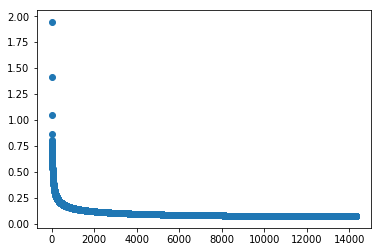

In [26]:
plt.scatter(iterations,neg_log_like_loss_history)

In [27]:
print(theta_final)

[[-2.69317451]
 [ 5.474673  ]
 [-0.74346404]
 [ 2.67260488]
 [-2.24421754]
 [-1.0577408 ]
 [ 4.28596209]
 [ 6.53221472]
 [-3.31089356]
 [-6.60630171]
 [ 8.67922255]
 [ 0.21360198]
 [ 4.55669028]
 [ 3.94985081]
 [ 1.48463401]
 [-4.45337415]
 [-3.09979679]
 [ 0.47318977]
 [-0.45686574]
 [-3.57953697]
 [ 5.69992137]
 [ 6.22261689]
 [ 3.40506916]
 [ 7.06051426]
 [ 5.08116551]
 [ 2.73739609]
 [ 3.79942412]
 [ 6.22365501]
 [ 2.94574074]
 [-1.26659037]]


In [28]:
theta_final.shape

(30, 1)

In [29]:
print(theta0_final)

[[-14.28466611]]


In [30]:
X_test = raw_data.iloc[486:]

In [31]:
X_test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
486,0,14.640,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.027910,0.1409,...,16.460,25.44,106.00,831.0,0.11420,0.20700,0.24370,0.07828,0.2455,0.06596
487,1,19.440,18.82,128.10,1167.0,0.10890,0.14480,0.225600,0.119400,0.1823,...,23.960,30.39,153.90,1740.0,0.15140,0.37250,0.59360,0.20600,0.3266,0.09009
488,0,11.680,16.17,75.49,420.5,0.11280,0.09263,0.042790,0.031320,0.1853,...,13.320,21.59,86.57,549.8,0.15260,0.14770,0.14900,0.09815,0.2804,0.08024
489,1,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,...,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
490,0,12.250,22.44,78.18,466.5,0.08192,0.05200,0.017140,0.012610,0.1544,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203
491,0,17.850,13.23,114.60,992.1,0.07838,0.06217,0.044450,0.041780,0.1220,...,19.820,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871
492,1,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.117000,0.077620,0.2116,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625
493,0,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,...,13.190,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
494,0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,...,14.500,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429
495,0,14.870,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.049510,0.1487,...,16.010,28.48,103.90,783.6,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599


In [32]:
testing_data_labels = X_test['diagnosis']

In [33]:
np.array(testing_data_labels)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [34]:
X_test.drop(['diagnosis'],axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
486,14.640,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.027910,0.1409,0.05355,...,16.460,25.44,106.00,831.0,0.11420,0.20700,0.24370,0.07828,0.2455,0.06596
487,19.440,18.82,128.10,1167.0,0.10890,0.14480,0.225600,0.119400,0.1823,0.06115,...,23.960,30.39,153.90,1740.0,0.15140,0.37250,0.59360,0.20600,0.3266,0.09009
488,11.680,16.17,75.49,420.5,0.11280,0.09263,0.042790,0.031320,0.1853,0.06401,...,13.320,21.59,86.57,549.8,0.15260,0.14770,0.14900,0.09815,0.2804,0.08024
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
490,12.250,22.44,78.18,466.5,0.08192,0.05200,0.017140,0.012610,0.1544,0.05976,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203
491,17.850,13.23,114.60,992.1,0.07838,0.06217,0.044450,0.041780,0.1220,0.05243,...,19.820,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.117000,0.077620,0.2116,0.06077,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,13.190,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
494,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,...,14.500,28.46,95.29,648.3,0.11180,0.16460,0.07698,0.04195,0.2687,0.07429
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.049510,0.1487,0.05748,...,16.010,28.48,103.90,783.6,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599


In [36]:
X_test_matrix = np.array(X_test)

In [40]:
X_test_matrix

array([[1.464e+01, 1.685e+01, 9.421e+01, ..., 7.828e-02, 2.455e-01,
        6.596e-02],
       [1.944e+01, 1.882e+01, 1.281e+02, ..., 2.060e-01, 3.266e-01,
        9.009e-02],
       [1.168e+01, 1.617e+01, 7.549e+01, ..., 9.815e-02, 2.804e-01,
        8.024e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [41]:
X_test_matrix = X_test_matrix/np.max(X_test_matrix, axis=0)

Now using the sigmoid function for biclass logestic regression

$ H = \frac{\mathrm1}{1 + \exp^-\theta^T.x} $

In [42]:
power = (theta0_final + np.matmul(X_test_matrix,theta_final))
H_theta0_theta = 1/(1 + np.exp(-power))

In [43]:
H_theta0_theta

array([[7.38283242e-01],
       [9.99999994e-01],
       [3.93842988e-01],
       [9.83075937e-01],
       [5.35199299e-01],
       [9.91631125e-01],
       [9.99998393e-01],
       [1.56920063e-03],
       [2.13464875e-01],
       [9.36016060e-01],
       [7.72985372e-01],
       [3.20583686e-01],
       [9.99999081e-01],
       [9.99999995e-01],
       [7.76872795e-01],
       [9.98594563e-01],
       [1.29979746e-01],
       [1.00000000e+00],
       [1.79807690e-04],
       [4.41306099e-04],
       [1.52991892e-02],
       [1.74452402e-03],
       [7.69716342e-01],
       [9.99942601e-01],
       [6.75573683e-04],
       [1.35098617e-01],
       [9.99889409e-01],
       [8.03317007e-01],
       [9.94912815e-01],
       [1.53156050e-01],
       [9.99999359e-01],
       [9.99999225e-01],
       [8.47184099e-01],
       [2.27277563e-01],
       [4.30599897e-03],
       [1.00000000e+00],
       [3.26426998e-03],
       [7.83348776e-01],
       [1.34564512e-02],
       [6.88680729e-04],


In [45]:
H_theta0_theta.shape

(83, 1)

In [47]:
predicted_labels = H_theta0_theta > 0.5

In [48]:
predicted_labels

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [49]:
predicted_test_labels = predicted_labels.reshape(predicted_labels.shape[0])

In [50]:
predicted_test_labels

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False])

In [51]:
correct_predictions = np.equal(predicted_test_labels,testing_data_labels)

In [52]:
correct_predictions

486    False
487     True
488     True
489     True
490    False
491    False
492     True
493     True
494     True
495    False
496    False
497     True
498     True
499     True
500    False
501     True
502     True
503     True
504     True
505     True
506     True
507     True
508    False
509     True
510     True
511     True
512     True
513    False
514     True
515     True
       ...  
539     True
540     True
541    False
542    False
543    False
544     True
545    False
546     True
547     True
548     True
549    False
550     True
551     True
552    False
553     True
554    False
555     True
556     True
557     True
558     True
559    False
560    False
561     True
562     True
563     True
564     True
565     True
566     True
567     True
568     True
Name: diagnosis, Length: 83, dtype: bool

In [53]:
correct_predictions.shape

(83,)

In [54]:
accuracy = np.count_nonzero(correct_predictions)/correct_predictions.shape[0]

In [55]:
accuracy

0.7349397590361446

In [67]:
print("The percent age accuracy is {}%".format(accuracy*100))

The percent age accuracy is 73.49397590361446%
